# China's One Child Policy

At what point are there too many men?


In [55]:
%matplotlib inline

from modsim import *

In [56]:
"""" game plan:
write a system with :
t0 = time started
adult population0 
    male pop0
    female pop0
death_rate = death rate of population

juvenile_pop0
maturation # = when they reach a certain age, they are considered good to birth/have a baby 
    maturation# = maturation[i-18] (if 18 is the "mature" number)
probability of being a girl or boy = calculcated from the male/female ratio
    
TimeSeries = array

run_simulation(system)
make two dataFrames, one young and one old w/ subarrays w/ males and females (and possibly total to make code cleaner) 
    FIGURE OUT HOW TO WRITE/INTIALIZE DATAFRAMES
set pop0 to actual data points

FOR every year: 
    #ofmaturationsgirls = system.young[i - (ageWhenMature)] #pulling the number of babies that were born ageWhenMature years ago
    #ofmaturationsboys = "              "                          "
    
    #ofbabiesNextYear = #ofmaturationsgirls
    young.males[t+1] = #ofbabiesNextYear * system.probOfB
    young.females[t+1] = #ofbabiesNextYear - young.males[t+1]
    
    #ofdeaths = adultpop[yearNow] * system.death_rate
    
    adultpopfemale = #ofmaturationgirls + adultpopfemale[yearBefore] - #ofdeaths/2
    adultpopmale = #ofmaturationboys + adultpopmale[yearBefore] - #ofdeaths/2


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-56-1b8acae58c62>, line 32)

In [128]:
system = System(t0 = 0, 
                t_end = 10,
                old_pop0 = 300,
                young_pop0 = 250,
                ageWhenMature = 18,
                youngMale0 = 200,
                youngFemale0 = 150,
                oldMale0 = 150,
                oldFemale0 = 150) #age at which young -> old and has a baby

systemDouble = System(death_rate = 0.5,
                      probOfBeingBoy = 0.67)
system

,value
t0,0
t_end,10
old_pop0,300
young_pop0,250
ageWhenMature,18
youngMale0,200
youngFemale0,150
oldMale0,150
oldFemale0,150


In [129]:
systemDouble

,value
death_rate,0.50
probOfBeingBoy,0.67


In [130]:
people = [[],[],[],[],[],[],[]] #creating a list series
youngMale = people[0]
youngFemale = people[1]
youngTotal = people[2]
oldMale = people[3]
oldFemale = people[4]
oldTotal = people[5]
population = people[6]

youngMale = [None]*max(system.t_end)
youngFemale = [None]*max(system.t_end)
youngTotal = [None]*max(system.t_end)
oldMale = [None]*max(system.t_end)
oldFemale = [None]*max(system.t_end)
oldTotal = [None]*max(system.t_end)
population = [None]*max(system.t_end)

oldTotal

[None, None, None, None, None, None, None, None, None, None]

In [131]:
beforePolicy=[200, 210, 215, 320, 310, 219, 247, 362, 274, 373, 249, 384, 258, 314, 246, 287, 293, 310]
beforePolicy

[200,
 210,
 215,
 320,
 310,
 219,
 247,
 362,
 274,
 373,
 249,
 384,
 258,
 314,
 246,
 287,
 293,
 310]

In [141]:
def run_simulation(system):
    people = [[],[],[],[],[],[],[]] #creating a list series
    youngMale = people[0]
    youngFemale = people[1]
    youngTotal = people[2]
    oldMale = people[3]
    oldFemale = people[4]
    oldTotal = people[5]
    population = people[6]

    youngMale = [None]*max(system.t_end)
    youngFemale = [None]*max(system.t_end)
    youngTotal = [None]*max(system.t_end)
    oldMale = [None]*max(system.t_end)
    oldFemale = [None]*max(system.t_end)
    oldTotal = [None]*max(system.t_end)
    population = [None]*max(system.t_end)

    oldTotal[system.t0] = system.old_pop0
    youngTotal[system.t0] = system.young_pop0
    youngMale[system.t0] = system.youngMale0
    youngFemale[system.t0] = system.youngFemale0
    oldMale[system.t0] = system.oldMale0
    oldFemale[system.t0] = system.oldFemale0
    
    
    for t in linrange(system.t0, system.t_end):
        i = 0
        
        if t < (system.t0 + system.ageWhenMature):
            maturationsGirls = beforePolicy[i]/2
            maturationsBoys = beforePolicy[i]/2
            
            babiesNextYear = maturationsGirls
            
            youngMale[int(t+1)] = babiesNextYear*systemDouble.probOfBeingBoy + youngMale[int(t)]
            youngFemale[int(t+1)] = babiesNextYear - youngMale[int(t+1)] + youngFemale[int(t)]
            youngTotal[int(t+1)] = youngMale[int(t+1)] + youngFemale[int(t+1)] + youngTotal[int(t)]
            
            deaths = systemDouble.death_rate * oldTotal[int(t)]
            
            oldFemale[int(t+1)] = maturationsGirls + oldFemale[int(t)] - deaths/2
            oldMale[int(t+1)] = maturationsBoys + oldMale[int(t)] - deaths/2
            oldTotal[int(t+1)] = oldFemale[int(t+1)] + oldMale[int(t+1)]
            
            i+=1
            
            
        else:
            maturationsGirls = youngFemale[int(t - system.ageWhenMature)]
            maturationsBoys = youngMale[int(t - system.ageWhenMature)]
            
            babiesNextYear = maturationsGirls
            
            youngMale[int(t+1)] = babiesNextYear*systemDouble.probOfBeingBoy + youngMale[int(t)]
            youngFemale[int(t+1)] = babiesNextYear - youngMale[int(t+1)] + youngFemale[int(t)]
            youngTotal[int(t+1)] = youngMale[int(t+1)] + youngFemale[int(t+1)] + youngTotal[int(t)]
            
            deaths = systemDouble.death_rate * oldTotal[int(t)]
            
            oldFemale[int(t+1)] = maturationsGirls + oldFemale[int(t)] - deaths/2
            oldMale[int(t+1)] = maturationsBoys + oldMale[int(t)] - deaths/2
            oldTotal[int(t+1)] = oldFemale[int(t+1)] + oldMale[int(t+1)]
            
    system.population = youngTotal[int(t+1)] + oldTotal[int(t+1)]

Test your changes in `run_simulation`:

In [142]:
run_simulation(system)

IndexError: list assignment index out of range

Next, update `plot_results` to plot both the adult and juvenile `TimeSeries`.

In [33]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'ro-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)


And test your updated version of `plot_results`.

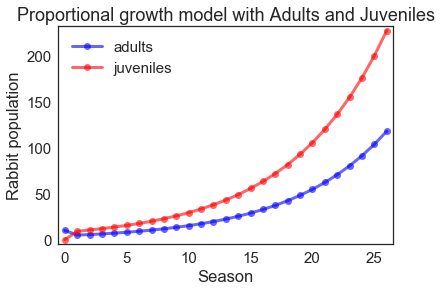

In [34]:
plot_results(system, title='Proportional growth model with Adults and Juveniles')

This notebook demonstrates the steps we recommend for starting your project:

1.  Start with one of the examples from the book, either by copying a notebook or pasting code into a new notebook.  Get the code working before you make any changes.

2.  Make one small change, and run the code again.

3.  Repeat step 2 until you have a basic implementation of your model.

If you start with working code that you understand and make small changes, you can avoid spending a lot of time debugging.

One you have a basic model working, you can think about what metrics to measure, what parameters to sweep, and how to use the model to predict, explain, or design.

### Bonus question

Suppose you only have room for 30 adult rabbits.  Whenever the adult population exceeds 30, you take any excess rabbits to market (as pets for kind children, of course).  Modify `run_simulation` to model this strategy.  What effect does it have on the behavior of the system?  You might have to run for more than 10 seasons to see what happens.

In [39]:
def run_simulation_bonus(system):
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        
        mature_juve = system.mature_rate * juveniles[t]
        
        juveniles[t+1] = juveniles[t] - mature_juve + births
        countAdults = adults[t] - deaths + mature_juve
        
        if countAdults > 30:
            countAdults = 30
        
        adults[t+1] = countAdults
        
    system.adults = adults
    system.juveniles = juveniles

In [40]:
run_simulation_bonus(system)
system.adults

,value
0,10.000000
1,5.000000
2,5.470000
3,6.209900
4,7.057723
5,8.021560
6,9.117031
7,10.362107
8,11.777219
9,13.385586


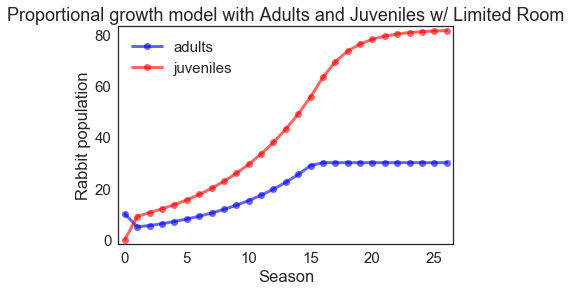

In [38]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'ro-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)

plot_results(system, title='Proportional growth model with Adults and Juveniles w/ Limited Room')